**Government spanding and social welfare (measured in the form of GDP)**

Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

read the dataset

In [3]:
data = pd.read_excel('GDP (current US$).xls', skiprows=[0, 1,2])
data1 = pd.read_excel('General government final consumption expenditure (current US$).xls', skiprows=[0, 1,2])

Choosing G20 Nations

In [4]:
specified_countries = [
    "Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India",
    "Indonesia", "Italy", "Japan", "Korea, Rep.", "Mexico", "Russian Federation",
    "Saudi Arabia", "South Africa", "Turkiye", "United Kingdom", "United States",
    "European Union"
]

filtered_data = data[data['Country Name'].isin(specified_countries)]
filtered_data1 = data1[data1['Country Name'].isin(specified_countries)]

In [5]:
filtered_data = filtered_data.drop('Indicator Name', axis=1)
filtered_data1 = filtered_data1.drop('Indicator Name', axis=1)

In [6]:
filtered_data = pd.melt(filtered_data, id_vars=['Country Name', 'Country Code', 'Indicator Code'], value_vars=['1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
        var_name='Year', value_name='Value')

filtered_data1 = pd.melt(filtered_data1, id_vars=['Country Name', 'Country Code', 'Indicator Code'], value_vars=['1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
        var_name='Year', value_name='Value')

In [8]:
des_filtered_data = filtered_data[filtered_data['Year'] == '2022']
sorted_df = des_filtered_data.sort_values(by='Value', ascending=False)
sorted_df = sorted_df.reset_index(drop = True)
#sorted_df

This shows that USA has highest GDP of $2.546270e+13 (current US\$) in 2022.




**Forcasting GDP**

In [35]:
specified_countries = [
   "China", "France", "Germany", "India", "Japan", "United Kingdom", "United States"
]
pred_filtered_data_ = filtered_data[filtered_data['Country Name'].isin(specified_countries)]
pred_filtered_data_ = pred_filtered_data_.dropna()
# Convert the 'Year' column to integers (assuming the year values are valid integers)
pred_filtered_data_['Year'] = pred_filtered_data_['Year'].astype(int)

# Filter data for years greater than 1970 and less than 2022
pred_filtered_data__ = pred_filtered_data_[(pred_filtered_data_['Year'] > 1970) & (pred_filtered_data_['Year'] <= 2022)]
#pred_filtered_data__[pred_filtered_data__['Year'] == 2022]

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset, assuming it contains values for each of the 20 countries from 1970 to 2022.
data = pred_filtered_data__

# Define the list of 20 countries you want to predict
countries_to_predict = specified_countries # Replace with the actual country names

# Define a function to preprocess data and make predictions for a given country
def predict_country_data(data, country_name):
    # Extract data for the specific country
    country_data = data[data['Country Name'] == country_name]
    country_values = country_data['GDP (current US$)'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler()
    country_values = scaler.fit_transform(country_values)

    # Define sequence length and create sequences
    seq_length = 10  # Adjust as needed
    sequences = []
    for i in range(len(country_values) - seq_length):
        seq = country_values[i:i+seq_length]
        sequences.append(seq)
    sequences = np.array(sequences)

    # Split data into input and output
    X = sequences[:, :-1]
    y = sequences[:, -1]

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(seq_length - 1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the historical data
    model.fit(X, y, epochs=50, batch_size=32)

    # Create an input sequence for 2023
    input_sequence_2023 = country_values[-seq_length+1:].reshape(1, seq_length - 1, 1)

    # Predict the value for 2023
    predicted_value_2023 = model.predict(input_sequence_2023)

    # Inverse the scaling to get the prediction in the original scale
    predicted_value_2023 = scaler.inverse_transform(predicted_value_2023)

    return predicted_value_2023

# Predict values for each country in 2023
predictions_2023 = {}
for country in countries_to_predict:
    predicted_value = predict_country_data(data, country)
    predictions_2023[country] = predicted_value


Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 0.1353
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1287
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1221
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1155
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1097
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1029
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0974
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0901
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0842
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0776
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0708
Epoch 12/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss:

1/1 [==============================] - 0s 178ms/step
Epoch 1/50
2/2 [==============================] - 1s 7ms/step - loss: 0.4423
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.4137
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3874
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3626
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3370
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3133
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2912
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2683
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2464
Epoch 10/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2255
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2048
Epoch 12/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1833
Epoch 13/50
2/2 [==

1/1 [==============================] - 0s 114ms/step
Epoch 1/50
2/2 [==============================] - 1s 8ms/step - loss: 0.2033
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1849
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1679
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1508
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1349
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1194
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1038
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0905
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0635
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 12/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0399
Epoch 13/50
2/2 [==

In [32]:
# Access the predicted value for a specific country (e.g., 'Country1')
predicted_value_for_country1 = predictions_2023['China']
predicted_value_for_country1

array([[2.0330318e+13]], dtype=float32)

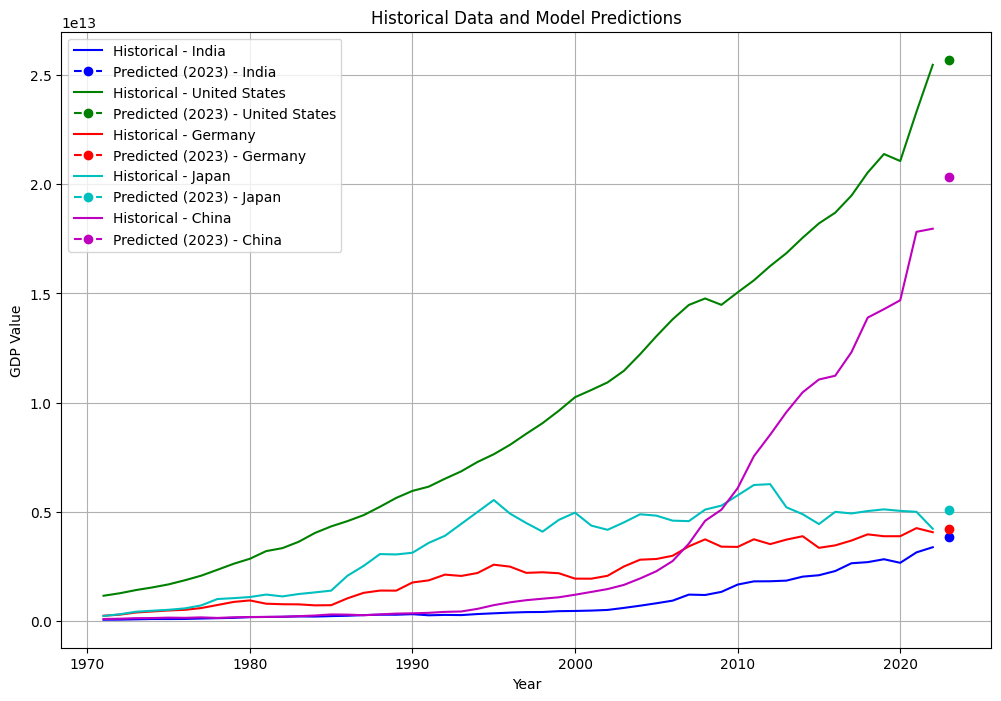

In [31]:
import matplotlib.pyplot as plt

# Define colors for the lines
colors = ['b', 'g', 'r', 'c', 'm']

# Countries to analyze
countries_to_analyze = ['India', 'United States', 'Germany', 'Japan', 'China']

# Plot the historical data and model predictions
plt.figure(figsize=(12, 8))

for i, country in enumerate(countries_to_analyze):
    historical_data = data[data['Country Name'] == country]
    predicted_values = predictions_2023[country]

    # Plot historical data
    plt.plot(historical_data['Year'], historical_data['GDP (current US$)'], label=f'Historical - {country}', color=colors[i])

    # Plot model predictions for 2023
    plt.plot(2023, predicted_values, marker='o', label=f'Predicted (2023) - {country}', linestyle='dashed', color=colors[i])

plt.title('Historical Data and Model Predictions')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.legend()
plt.grid(True)

plt.show()


**GDP growth over time**

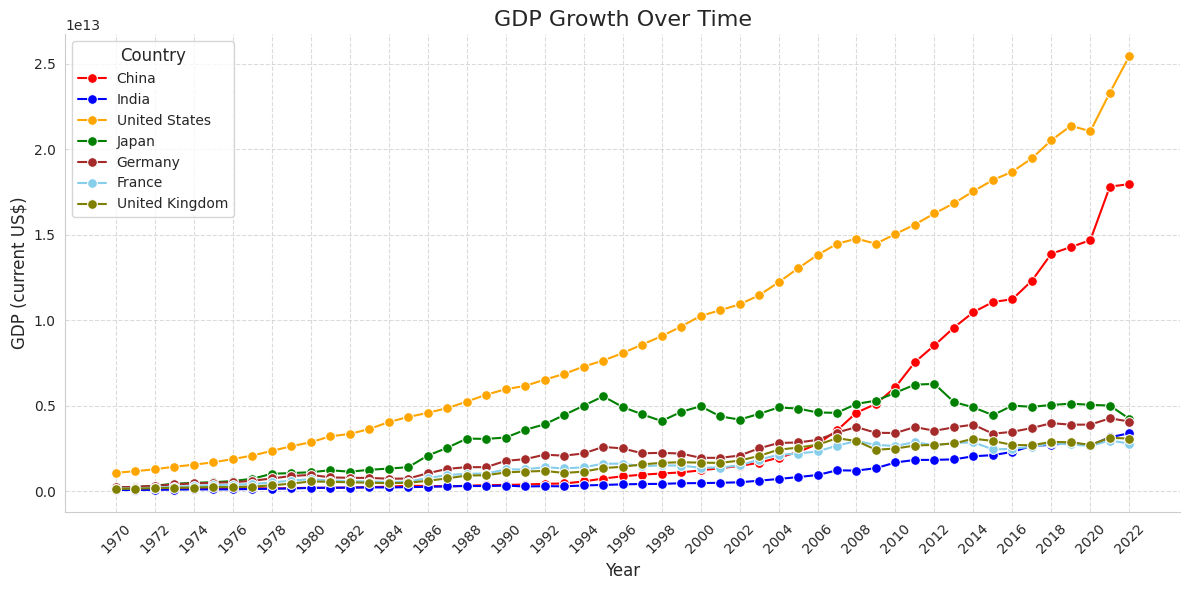

In [101]:
new_filtered_data = filtered_data[filtered_data['Country Name'].isin(['India','China','United States','Japan', 'Germany', 'France', 'United Kingdom'])]
pivoted_data = new_filtered_data.pivot(index='Year', columns='Country Name', values='Value')
pivoted_data = pivoted_data.dropna()

# Create a time series plot with Seaborn
plt.figure(figsize=(12, 6))

# Define a custom color palette
colors = ['blue', 'orange','green']

# Use the palette for color consistency
sns.set_palette(colors)

sns.lineplot(x=pivoted_data.index, y=pivoted_data['China'], marker='o', markersize=7, linestyle='-', label='China', color = 'red')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['India'], marker='o', markersize=7, linestyle='-', label='India', color = 'blue')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['United States'], marker='o', markersize=7, linestyle='-', label='United States', color='orange')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['Japan'], marker='o', markersize=7, linestyle='-', label='Japan', color='green')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['Germany'], marker='o', markersize=7, linestyle='-', label='Germany', color='brown')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['France'], marker='o', markersize=7, linestyle='-', label='France', color='skyblue')
sns.lineplot(x=pivoted_data.index, y=pivoted_data['United Kingdom'], marker='o', markersize=7, linestyle='-', label='United Kingdom', color='olive')


# Add labels and a title
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (current US$)', fontsize=12)
plt.title('GDP Growth Over Time', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show only even years on the x-axis
even_years = pivoted_data.index[::2]
plt.xticks(even_years)

# Customize legend
plt.legend(title='Country', title_fontsize=12, loc='upper left')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize plot style
sns.set_style("whitegrid")

# Remove spines
sns.despine()

# Autoscale the y-axis to cover the entire range
plt.autoscale()

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
filtered_data.rename(columns={'Value': 'GDP (current US$)'}, inplace=True)
filtered_data1.rename(columns={'Value': 'General government final consumption expenditure (current US$)'}, inplace=True)

In [10]:
result = pd.concat([filtered_data,
                    filtered_data1['General government final consumption expenditure (current US$)']], axis=1)

In [12]:
#result.sort_values(by='General government final consumption expenditure (current US$)', ascending=False).head(20)

In [14]:
new_result = result[filtered_data1['Country Name'].isin(['China','United States'])]
selected_years = new_result[new_result['Year'].isin(['1980','2000', '2020'])]
selected_years = selected_years.reset_index(drop = True)

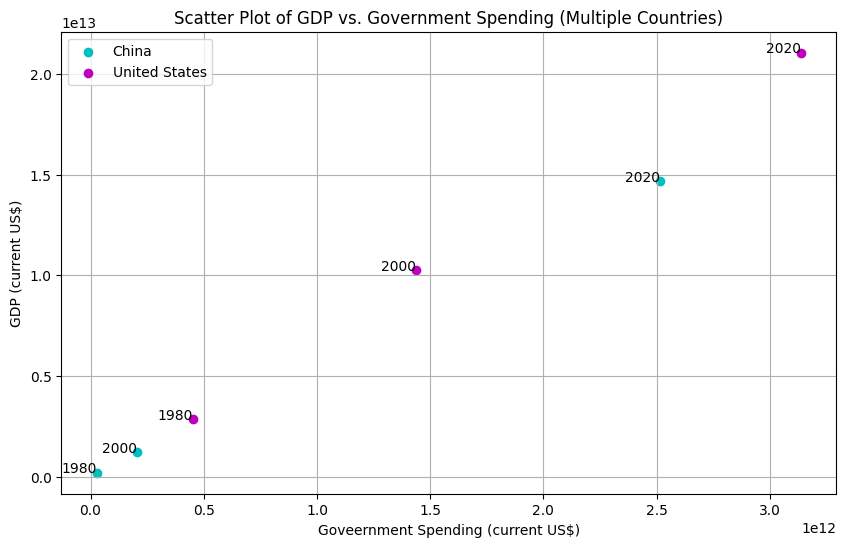

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with the provided data
data = {
    'Country Name': ['China', 'United States', 'China', 'United States', 'China', 'United States'],
    'Year': [1980, 1980, 2000, 2000, 2020, 2020],
    'GDP (current US$)': selected_years['GDP (current US$)'],
    'General Govt. Spending (current US$)': selected_years['General government final consumption expenditure (current US$)']
}

df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(10, 6))

countries = df['Country Name'].unique()
colors = [ 'c', 'm']  # Add more colors as needed

for i, country in enumerate(countries):
    country_data = df[df['Country Name'] == country]
    plt.scatter(
        country_data['General Govt. Spending (current US$)'],
        country_data['GDP (current US$)'],
        marker='o',
        label=country,
        color=colors[i]
    )

# Label each point with the year
for i, year in enumerate(df['Year']):
    plt.annotate(
        str(year),
        (df['General Govt. Spending (current US$)'].iloc[i], df['GDP (current US$)'].iloc[i]),
        fontsize=10,
        ha='right'
    )

plt.xlabel('Goveernment Spending (current US$)')
plt.ylabel('GDP (current US$)')
plt.title('Scatter Plot of GDP vs. Government Spending (Multiple Countries)')
plt.grid(True)
plt.legend()

plt.show()
